In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('dataset_ecommerce.csv', encoding='windows-1252')

In [6]:
df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


In [8]:
# Listando as colunas
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [12]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [14]:
# Criando um novo DataFrame 'dfCustomer' com CustomerID não nulo
dfCustomer = df[df['CustomerID'].notna()].copy()

In [16]:
print(dfCustomer.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [28]:
def classificar_invoice(invoice_no):
    """Classifica o InvoiceNo com base no primeiro caractere."""
    if isinstance(invoice_no, str) and invoice_no:  # Verifica se é string e não está vazio
        if invoice_no.startswith('A'):
            return 'Ajustar'
        elif invoice_no.startswith('C'):
            return 'Cancelada'
        else:
            return 'Registrada'
    else:
        return 'Registrada' # Caso o primeiro caracter não seja string ou esteja vazio, retorna 'Registrada'


# Aplica a função para criar a nova coluna 'StatusInvoice'
dfCustomer['StatusInvoice'] = dfCustomer['InvoiceNo'].apply(classificar_invoice)

# Exibe o DataFrame com a nova coluna
print(dfCustomer[['InvoiceNo', 'StatusInvoice']]) #exibe apenas as colunas relevantes para verificar o resultado.

       InvoiceNo StatusInvoice
0         536365    Registrada
1         536365    Registrada
2         536365    Registrada
3         536365    Registrada
4         536365    Registrada
...          ...           ...
541904    581587    Registrada
541905    581587    Registrada
541906    581587    Registrada
541907    581587    Registrada
541908    581587    Registrada

[406829 rows x 2 columns]


In [30]:
dfCustomer.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,StatusInvoice,InvoiceNumber
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Registrada,536365
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Registrada,536365
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Registrada,536365
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Registrada,536365
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Registrada,536365
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom,Registrada,536365
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,Registrada,536365
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,Registrada,536366
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,Registrada,536366
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,Registrada,536367


In [32]:
contagem_status = dfCustomer['StatusInvoice'].value_counts()

print(contagem_status)

StatusInvoice
Registrada    397924
Cancelada       8905
Name: count, dtype: int64


In [34]:
import re

def extrair_numeros(invoice_no):
    """Extrai os números de uma string InvoiceNo."""
    if isinstance(invoice_no, str):
        numeros = re.findall(r'\d+', invoice_no) # Encontra todas as sequências de dígitos
        if numeros:
            return ''.join(numeros) # Junta os números encontrados em uma única string
        else:
            return None # Retorna None se nenhum número for encontrado
    else:
        return None # Retorna None se o valor não for uma string

# Aplica a função para criar a nova coluna 'InvoiceNumber'
dfCustomer['InvoiceNumber'] = dfCustomer['InvoiceNo'].apply(extrair_numeros)

# Exibe o DataFrame com a nova coluna
print(dfCustomer[['InvoiceNo', 'InvoiceNumber']].head()) # Exibe as primeiras linhas para verificação

  InvoiceNo InvoiceNumber
0    536365        536365
1    536365        536365
2    536365        536365
3    536365        536365
4    536365        536365


In [36]:
print(dfCustomer[dfCustomer['StatusInvoice'] == 'Cancelada'].head(20))

     InvoiceNo StockCode                          Description  Quantity  \
141    C536379         D                             Discount        -1   
154    C536383    35004C      SET OF 3 COLOURED  FLYING DUCKS        -1   
235    C536391     22556       PLASTERS IN TIN CIRCUS PARADE        -12   
236    C536391     21984     PACK OF 12 PINK PAISLEY TISSUES        -24   
237    C536391     21983     PACK OF 12 BLUE PAISLEY TISSUES        -24   
238    C536391     21980    PACK OF 12 RED RETROSPOT TISSUES        -24   
239    C536391     21484          CHICK GREY HOT WATER BOTTLE       -12   
240    C536391     22557     PLASTERS IN TIN VINTAGE PAISLEY        -12   
241    C536391     22553               PLASTERS IN TIN SKULLS       -24   
939    C536506     22960             JAM MAKING SET WITH JARS        -6   
1441   C536543     22632            HAND WARMER RED RETROSPOT        -1   
1442   C536543     22355            CHARLOTTE BAG SUKI DESIGN        -2   
1973   C536548     22244 

In [38]:
dfCustomer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNo      406829 non-null  object 
 1   StockCode      406829 non-null  object 
 2   Description    406829 non-null  object 
 3   Quantity       406829 non-null  int64  
 4   InvoiceDate    406829 non-null  object 
 5   UnitPrice      406829 non-null  float64
 6   CustomerID     406829 non-null  float64
 7   Country        406829 non-null  object 
 8   StatusInvoice  406829 non-null  object 
 9   InvoiceNumber  406829 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 34.1+ MB


In [40]:
# a coluna 'ValorVenda' foi adicionada ao DataFrame dfCustomer
dfCustomer['InvoiceValue'] = dfCustomer['Quantity'] * dfCustomer['UnitPrice']

In [42]:
dfCustomer.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,StatusInvoice,InvoiceNumber,InvoiceValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Registrada,536365,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Registrada,536365,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Registrada,536365,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Registrada,536365,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Registrada,536365,20.34


In [48]:
# Distribuição da variável (StatusInvoice)
print("Distribuição da Variável StatusInvoice")
print(dfCustomer['StatusInvoice'].value_counts(), "\n")             #contagem absoluta
print(dfCustomer['StatusInvoice'].value_counts(normalize=True))     #proporção

Distribuição da Variável StatusInvoice
StatusInvoice
Registrada    397924
Cancelada       8905
Name: count, dtype: int64 

StatusInvoice
Registrada    0.978111
Cancelada     0.021889
Name: proportion, dtype: float64


In [50]:
# Estatística básica das variáveis numéricas
print("Estatística de InvoiceValue")
print(dfCustomer['InvoiceValue'].describe())

Estatística de InvoiceValue
count    406829.000000
mean         20.401854
std         427.591718
min     -168469.600000
25%           4.200000
50%          11.100000
75%          19.500000
max      168469.600000
Name: InvoiceValue, dtype: float64


In [56]:
# Obtém os valores únicos de StatusInvoice
status_invoices = dfCustomer['StatusInvoice'].unique()

# Itera sobre cada StatusInvoice e exibe as estatísticas
for status in status_invoices:
    print(f"Estatísticas para StatusInvoice: {status}")
    print(dfCustomer[dfCustomer['StatusInvoice'] == status]['InvoiceValue'].describe())
    print("\n" + "-" * 40 + "\n") # Linha separadora para melhor visualização


Estatísticas para StatusInvoice: Registrada
count    397924.000000
mean         22.394749
std         309.055588
min           0.000000
25%           4.680000
50%          11.800000
75%          19.800000
max      168469.600000
Name: InvoiceValue, dtype: float64

----------------------------------------

Estatísticas para StatusInvoice: Cancelada
count      8905.000000
mean        -68.651554
std        2019.177682
min     -168469.600000
25%         -17.000000
50%          -8.500000
75%          -3.300000
max          -0.120000
Name: InvoiceValue, dtype: float64

----------------------------------------



In [58]:
#Verificar a frequencia de alguns campos categóricos --> dfCustomer Country
print("Distribuição por Country")
print(dfCustomer['Country'].value_counts(dropna=False))

Distribuição por Country
Country
United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebano

In [60]:
#Verificar a frequencia de alguns campos categóricos --> dfCustomer Description
print("Distribuição por Description")
print(dfCustomer['Description'].value_counts(dropna=False))

Distribuição por Description
Description
WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
                                      ... 
ANTIQUE RASPBERRY FLOWER EARRINGS        1
WALL ART,ONLY ONE PERSON                 1
GOLD/AMBER DROP EARRINGS W LEAF          1
INCENSE BAZAAR PEACH                     1
PINK BAROQUE FLOCK CANDLE HOLDER         1
Name: count, Length: 3896, dtype: int64


# 2. Análise Exploratória dos Dados

In [65]:
# Importação da dupla dinâmica para visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
### 2.1 Distribuição da Variável (StatusInvoice)

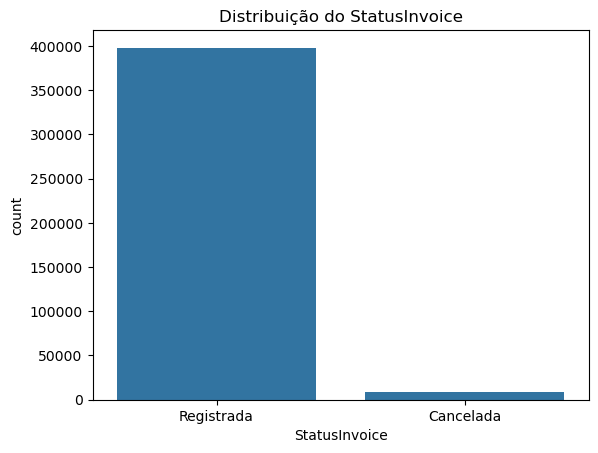

In [75]:
# Gráfico de contagem para a variável alvo
sns.countplot(x='StatusInvoice', data=dfCustomer)
plt.title('Distribuição do StatusInvoice')
plt.show()

Eixo X (StatusInvoice):
Este eixo representa as diferentes categorias da variável "StatusInvoice".
As duas categorias presentes são:
"Registrada"
"Cancelada"

Eixo Y (count):
Este eixo representa a contagem de ocorrências para cada categoria de "StatusInvoice".
Os valores variam de 0 a 400.000.
Barras:

Registrada:
A barra para "Registrada" é extremamente alta, quase atingindo 400.000.
Isso indica que a grande maioria dos registros tem o status "Registrada".

Cancelada:
A barra para "Cancelada" é muito baixa, quase imperceptível em comparação com "Registrada".
Isso indica que apenas uma pequena fração dos registros tem o status "Cancelada".

Obs em contagem de registros

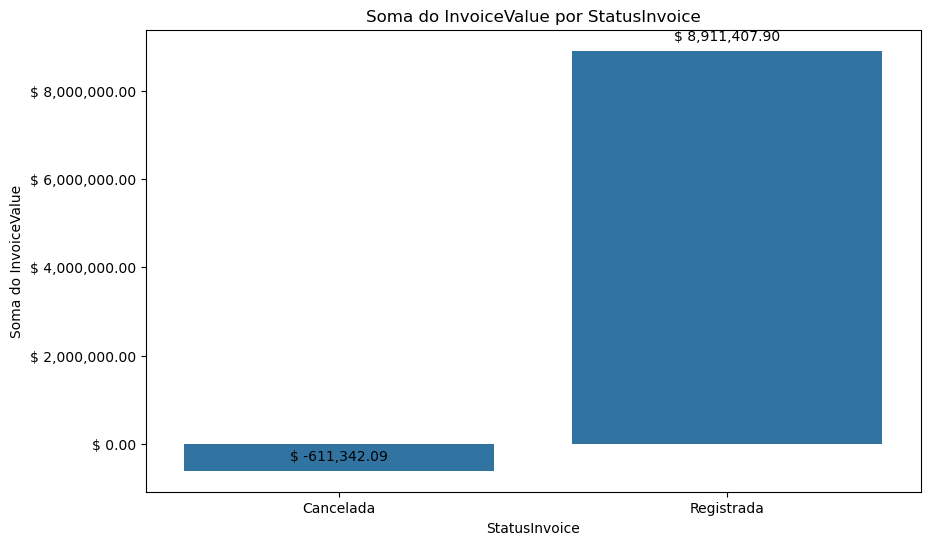

In [84]:
import matplotlib.ticker as mticker
# Agrupa por StatusInvoice e soma os valores de InvoiceValue
invoice_value_por_status = dfCustomer.groupby('StatusInvoice')['InvoiceValue'].sum().reset_index()

# Cria o gráfico de barras
plt.figure(figsize=(10, 6)) # Ajusta o tamanho da figura
ax = sns.barplot(x='StatusInvoice', y='InvoiceValue', data=invoice_value_por_status)

# Adiciona rótulos de valores às barras
for p in ax.patches:
    ax.annotate(f'$ {p.get_height():,.2f}', # Formata como moeda brasileira
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

# Formata o eixo y como moeda brasileira
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('$ {x:,.2f}'))

# Adiciona título e rótulos aos eixos
plt.title('Soma do InvoiceValue por StatusInvoice')
plt.xlabel('StatusInvoice')
plt.ylabel('Soma do InvoiceValue')

# Exibe o gráfico
plt.show()

In [ ]:
# Histograma para city_development_index
plt.hist(dfCustomer['city_development_index'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição do Índice de Desenvolvimento da Cidade')
plt.xlabel('Índice de desenvolvimento da cidade')
plt.ylabel('Quantidade de candidatos')
plt.show()